Importando as bibliotecas necessárias 

In [16]:
#Bibliotecas do sklearn para pegar o modelo, metricas e modelos de seleção
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, ConfusionMatrixDisplay, accuracy_score, recall_score, f1_score

#Biblioteca para plotar os gráficos dos resultados
import matplotlib.pyplot as plt
plt.style.use('_mpl-gallery')

#Bibliotecas para manipulação de dados
import pandas as pd
import numpy as np

#Evitar que Avisos sejam exibidos durante o treinamenot
import warnings
warnings.filterwarnings("ignore")

Realizando a leitura do arquivo csv

In [17]:
df = pd.read_csv("dataset/Cancer_Data.csv")

#Manipulando os dados 
- Separando os labels e os valores
- Normalizando os valores

In [18]:
dataValues = df.iloc[:, 2:-1].values
dataLabels = df.iloc[:, 1:2].values


#Normalizando os valores antes de realizar o treino
dataValues = (dataValues - np.mean(dataValues, axis=0)) / np.std(dataValues, axis=0)

#Utilizando o método de Cross-Validation e outras métricas para analisar alguns parâmetros para execução do MLP



Separando o conjunto de dados em treinamento e de teste

In [19]:
x_train, x_test, y_train, y_test = train_test_split(dataValues, dataLabels, test_size=0.25, random_state=42)

Criando um dicionário com diferentes modelos MLP com diferentes variáveis

In [25]:
listModels = {
 "MLP default values" : MLPClassifier(random_state=1),
 "MLP with 10 iterations (default = 200)": MLPClassifier(random_state=1, max_iter=10),
 "MLP with 10000 iterations (default = 200)": MLPClassifier(random_state=1, max_iter=10000),
 "MLP Increase the number of hidden_layer_sizes to 500 (default = 100)": MLPClassifier(random_state=1, hidden_layer_sizes=(500,)),
 "MLP decrease the number of hidden_layer_sizes to 10 (default = 100)": MLPClassifier(random_state=1, hidden_layer_sizes=(10,)),
 "MLP usign logistic activation function (default = 'relu')": MLPClassifier(random_state=1, activation='logistic'),
 "MLP usign identity activation function (default = 'relu')": MLPClassifier(random_state=1, activation='identity'),
 "MLP usign lbfgs solver (default = 'adam')": MLPClassifier(random_state=1, solver='lbfgs'),
 "MLP usign sgd solver (default = 'adam')": MLPClassifier(random_state=1, solver='sgd'),
 "MLP usign adaptive as learning rate (default = 'constant')": MLPClassifier(random_state=1, solver='sgd', learning_rate='adaptive'),
 "MLP usign invscaling as learning rate (default = 'constant')": MLPClassifier(random_state=1, solver='sgd', learning_rate='invscaling'),
}

#Listas para armazenar os resultados, para printar o gráfico
listValidation = []
listAccuracyTrain = []
listAccuracyTest = []
listPrecision = []
listSensitivy = []
listF1 = []

Executando esses diferentes modelos e testando:
- Sua média de score no crossvalidation
- Sua acurácia de treino
- Sua acurácia de test





### MLP default values ###
Validation Score 0.9719142990218911
Accuracy train: 0.9929577464788732
Accuracy test: 0.972027972027972
Precisão do teste: 0.9775280898876404
Sensibilidade (recall) do teste: 0.9775280898876404
F1-Score do teste: 0.9775280898876404



### MLP with 10 iterations (default = 200) ###
Validation Score 0.9455674584691819
Accuracy train: 0.9553990610328639
Accuracy test: 0.9440559440559441
Precisão do teste: 0.9550561797752809
Sensibilidade (recall) do teste: 0.9550561797752809
F1-Score do teste: 0.9550561797752809



### MLP with 10000 iterations (default = 200) ###
Validation Score 0.9754230709517155
Accuracy train: 0.9953051643192489
Accuracy test: 0.965034965034965
Precisão do teste: 0.9772727272727273
Sensibilidade (recall) do teste: 0.9662921348314607
F1-Score do teste: 0.9717514124293786



### MLP Increase the number of hidden_layer_sizes to 500 (default = 100) ###
Validation Score 0.9754230709517155
Accuracy train: 1.0
Accuracy test: 0.972027972027972
P

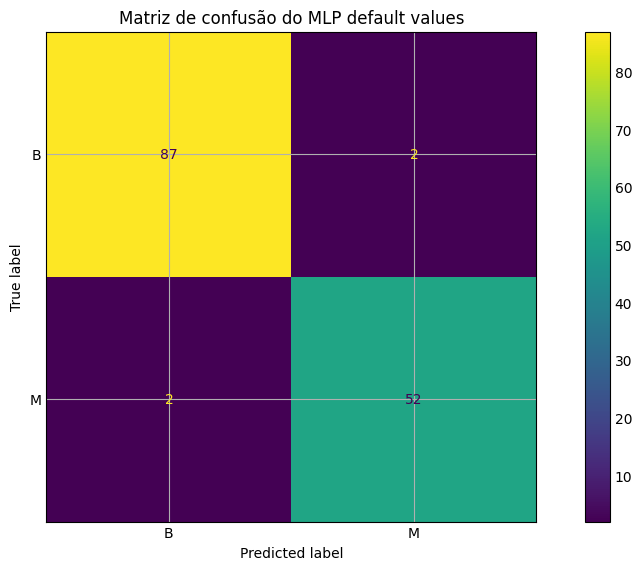

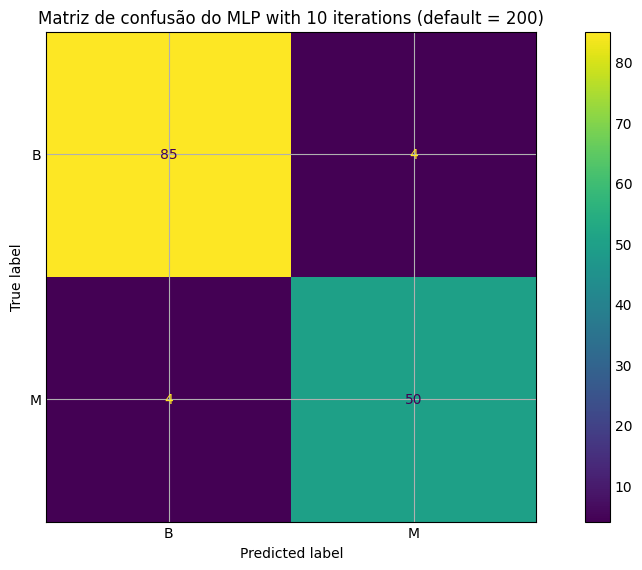

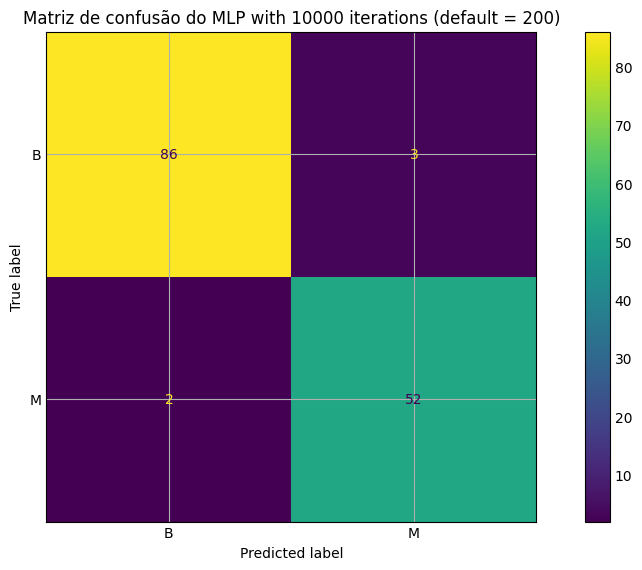

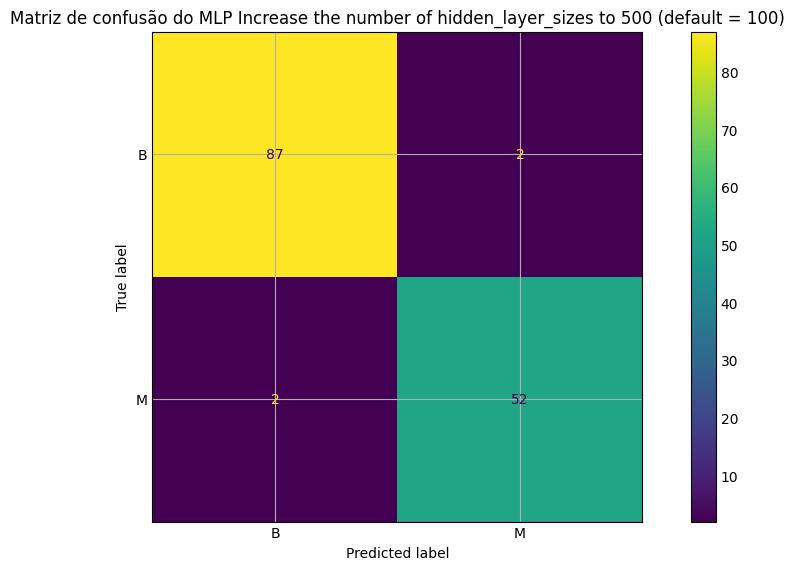

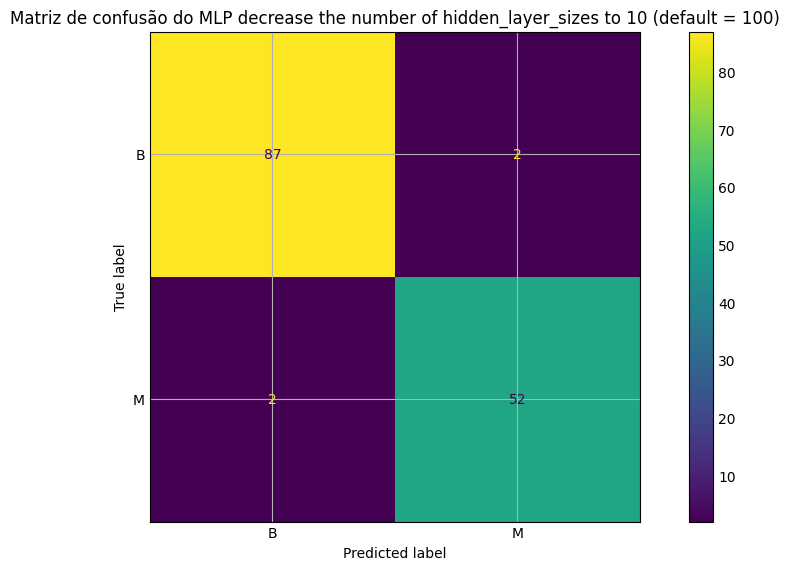

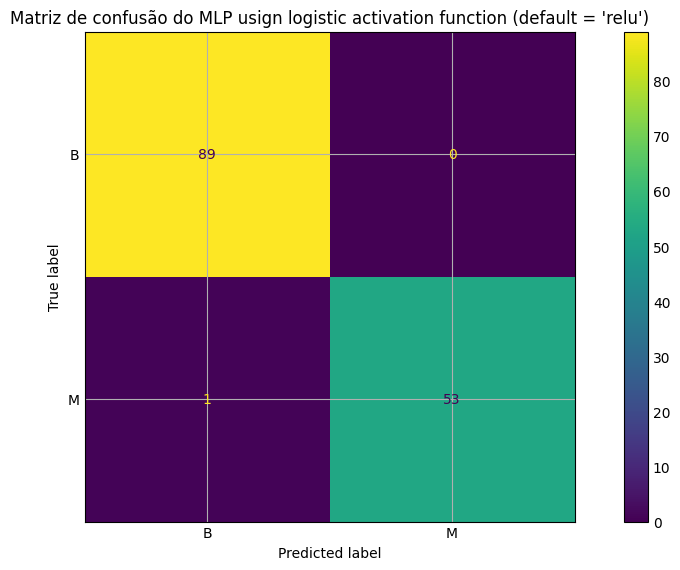

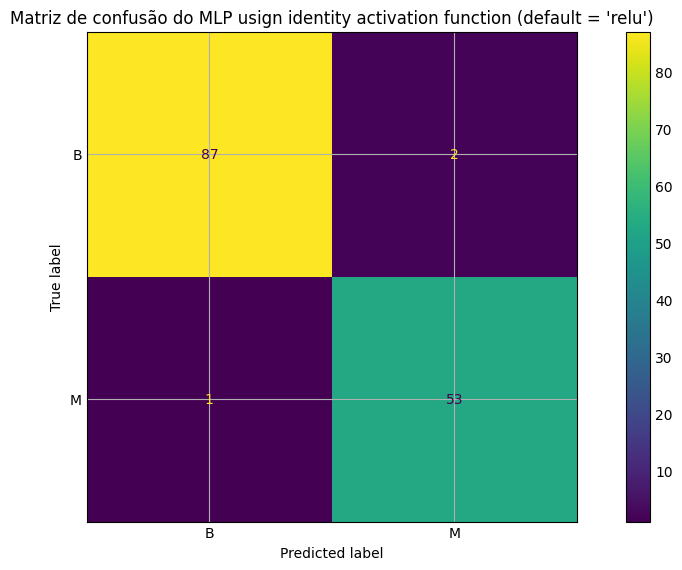

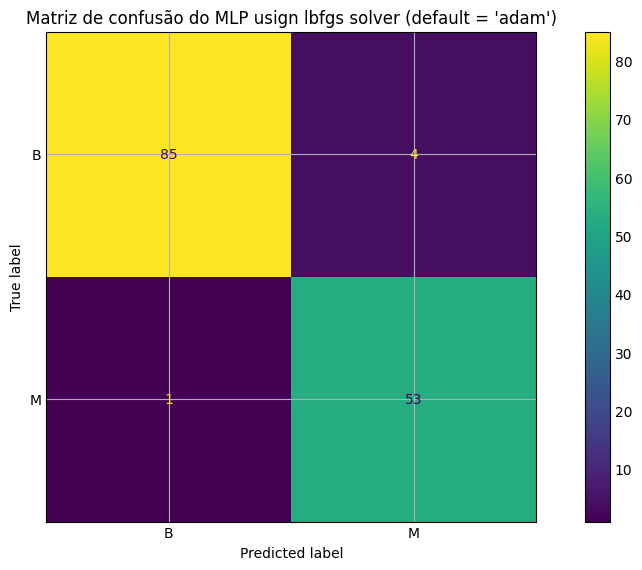

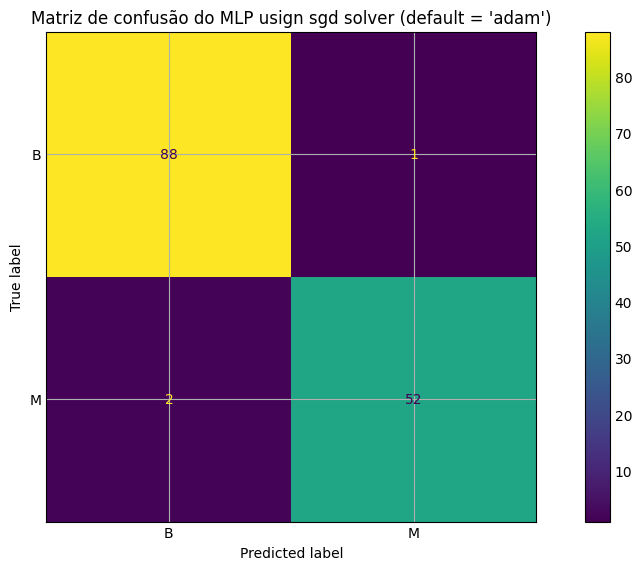

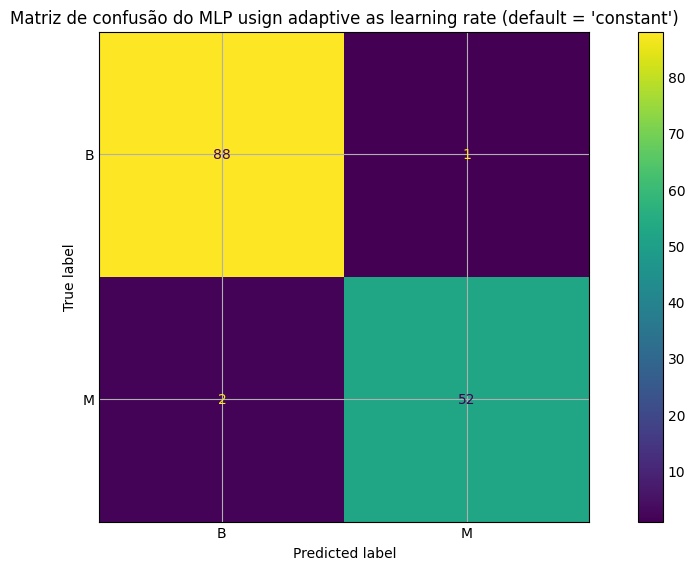

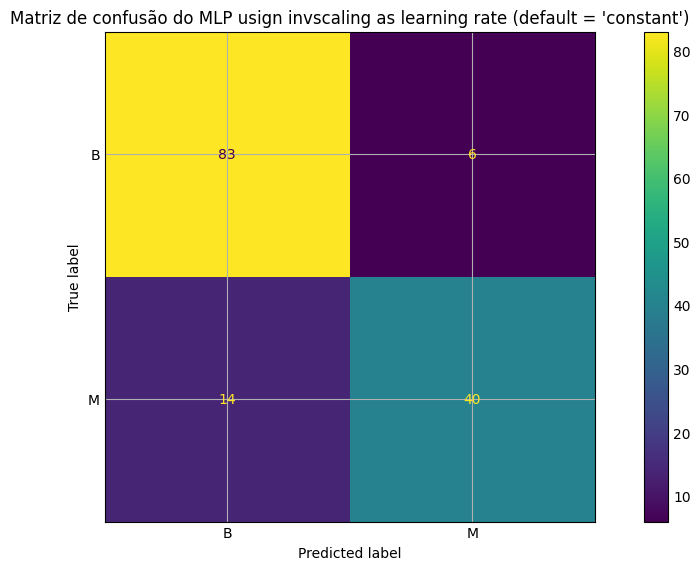

In [26]:
for name, model in listModels.items():

  print(f"\n\n\n### {name} ###")

  #Usigin the Cross Validation to train the model
  scores = cross_val_score(model, dataValues,dataLabels, cv=5)
  mean_score = np.mean(scores)
  listValidation.append(mean_score)
  print("Validation Score", mean_score)

  #Trainning the Model
  model = model.fit(x_train, y_train)
  modelPredict = model.predict(x_train)
  accuracy = accuracy_score(y_train, modelPredict)
  listAccuracyTrain.append(accuracy)
  print(f"Acurácia do treino: {accuracy}")

  #Verify the accuracy with the data of test
  modelPredict = model.predict(x_test)
  accuracy = accuracy_score(y_test, modelPredict)
  listAccuracyTest.append(accuracy)
  print(f"Acurácia do teste: {accuracy}")

  precision = precision_score(y_test, modelPredict, pos_label='B')
  listPrecision.append(precision)
  print(f"Precisão do teste: {precision}")

  sensi = recall_score(y_test, modelPredict, pos_label='B')
  listSensitivy.append(sensi)
  print(f"Sensibilidade (recall) do teste: {sensi}")
  
  f1 = f1_score(y_test, modelPredict, pos_label='B')
  listF1.append(f1)
  print(f"F1-Score do teste: {f1}")
    
  fig, ax = plt.subplots(figsize=(10, 5))
  ConfusionMatrixDisplay.from_predictions(y_test, modelPredict, ax=ax)
  _ = ax.set_title(f"Matriz de confusão do {name}")

Plotando os resultados obtidos nos diferentes modelos

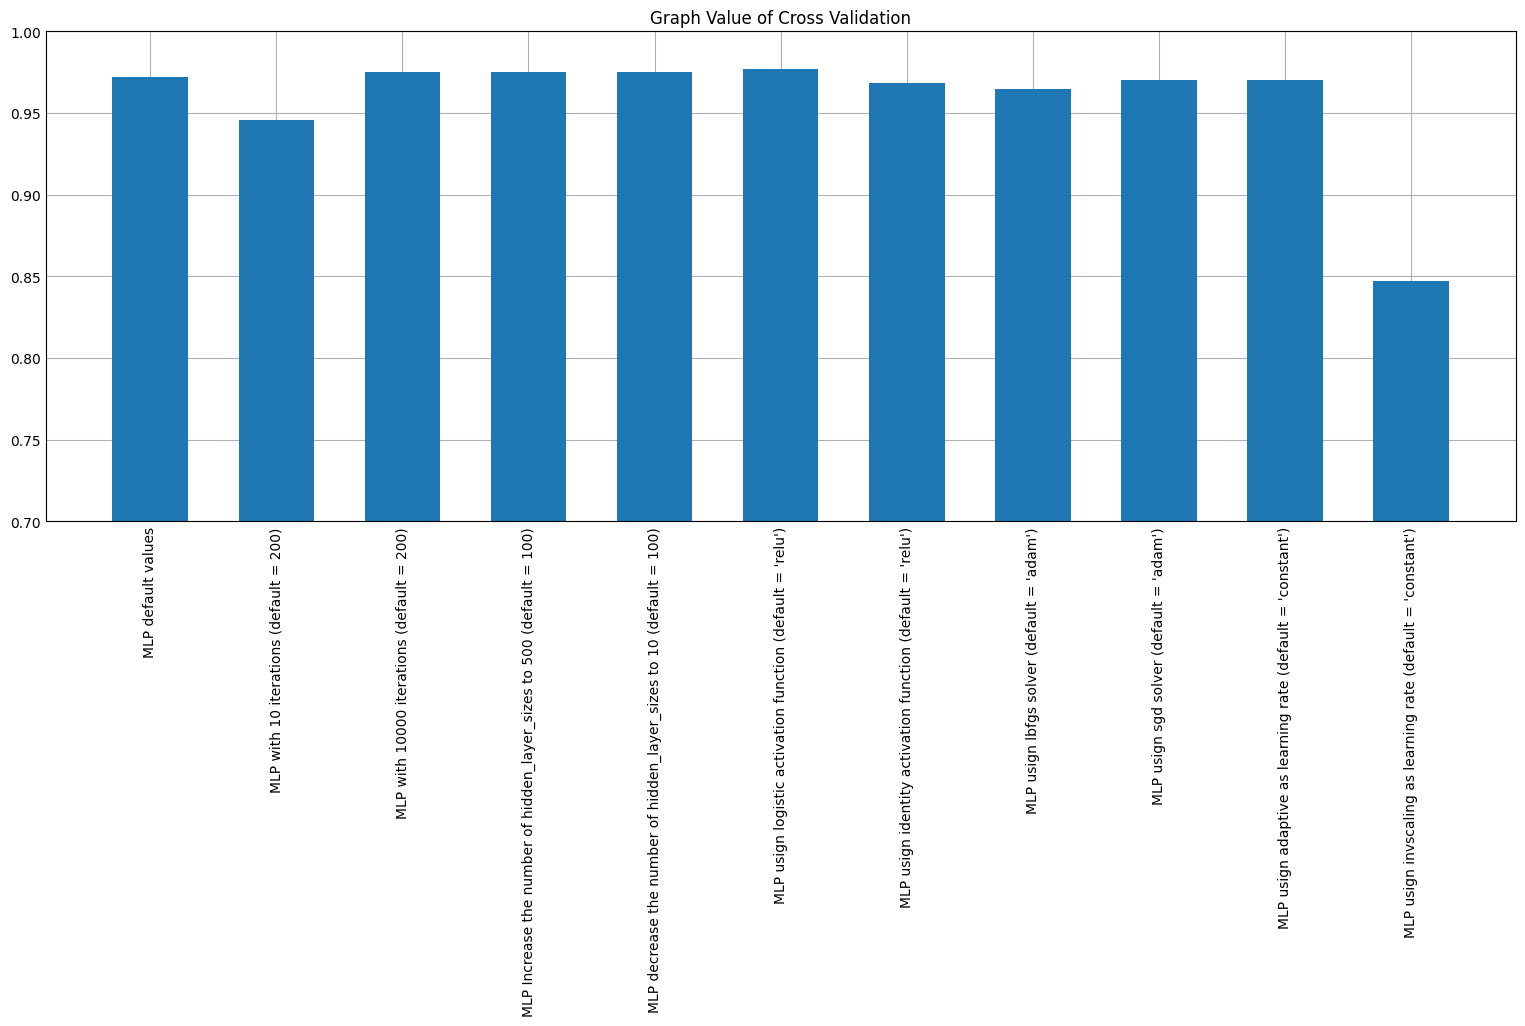

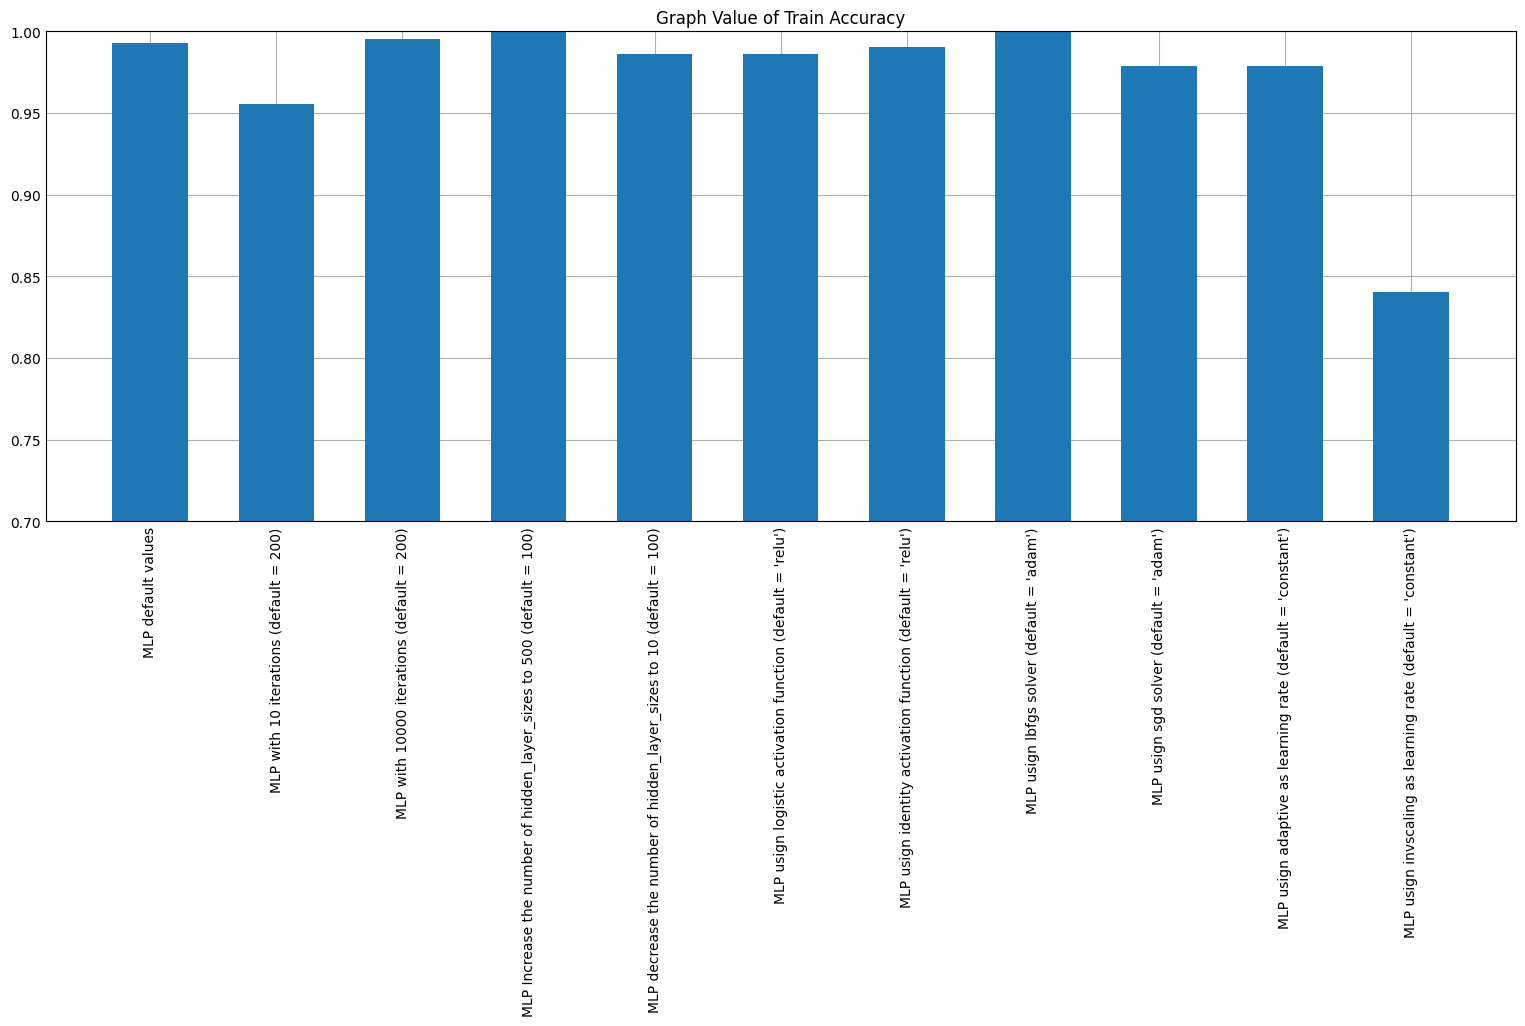

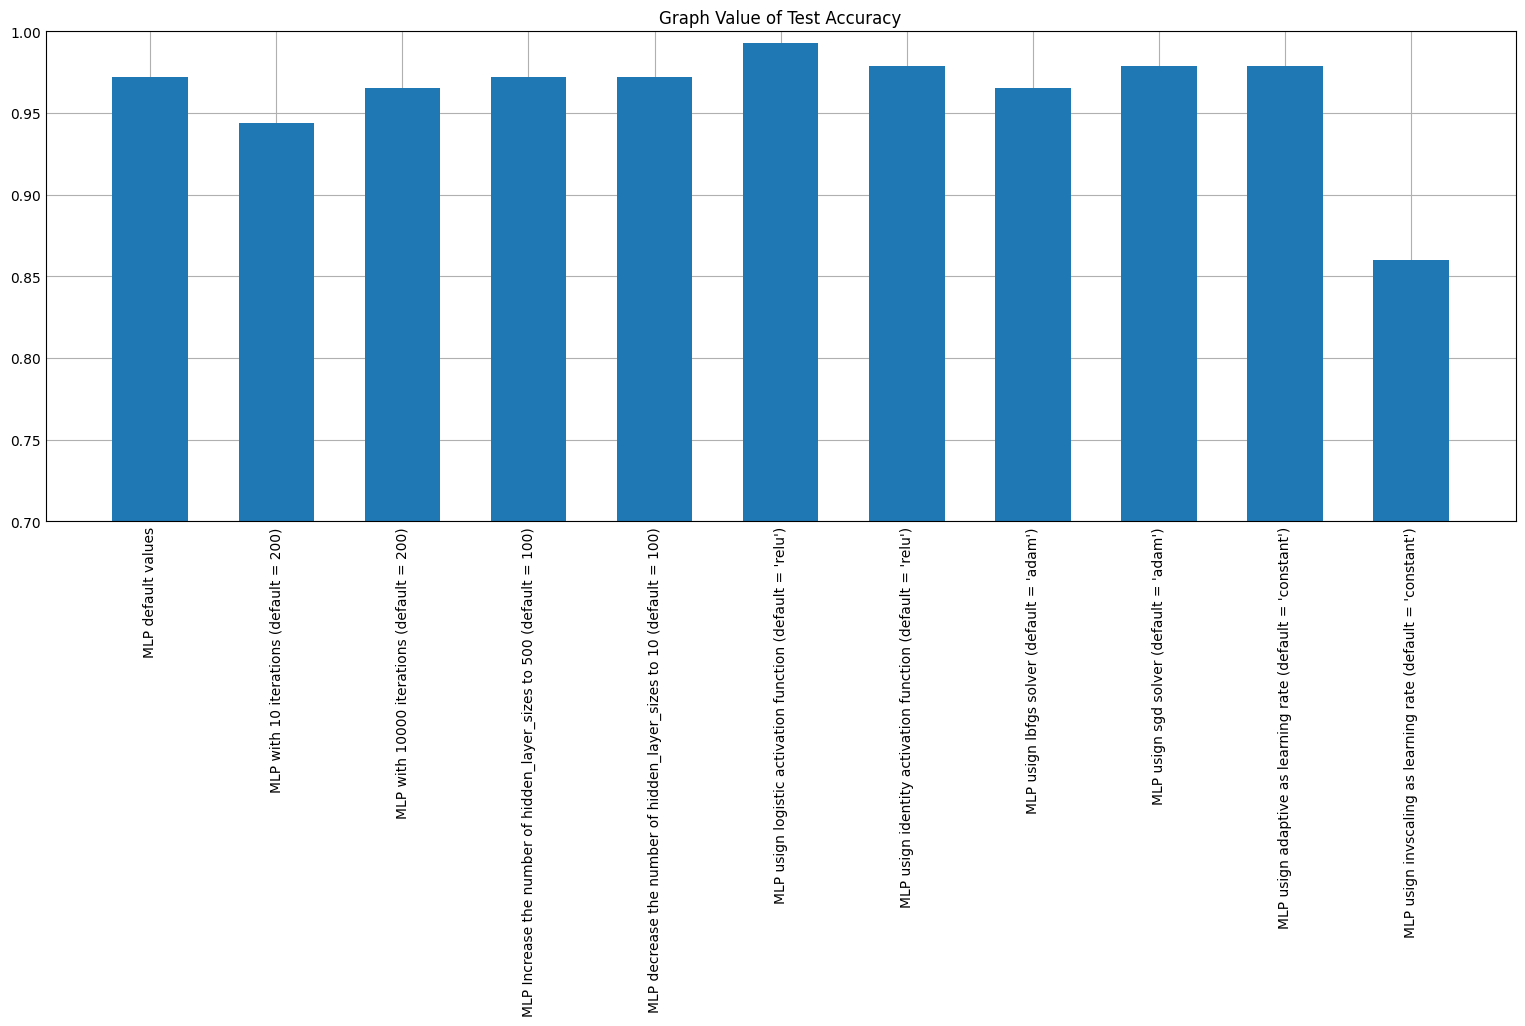

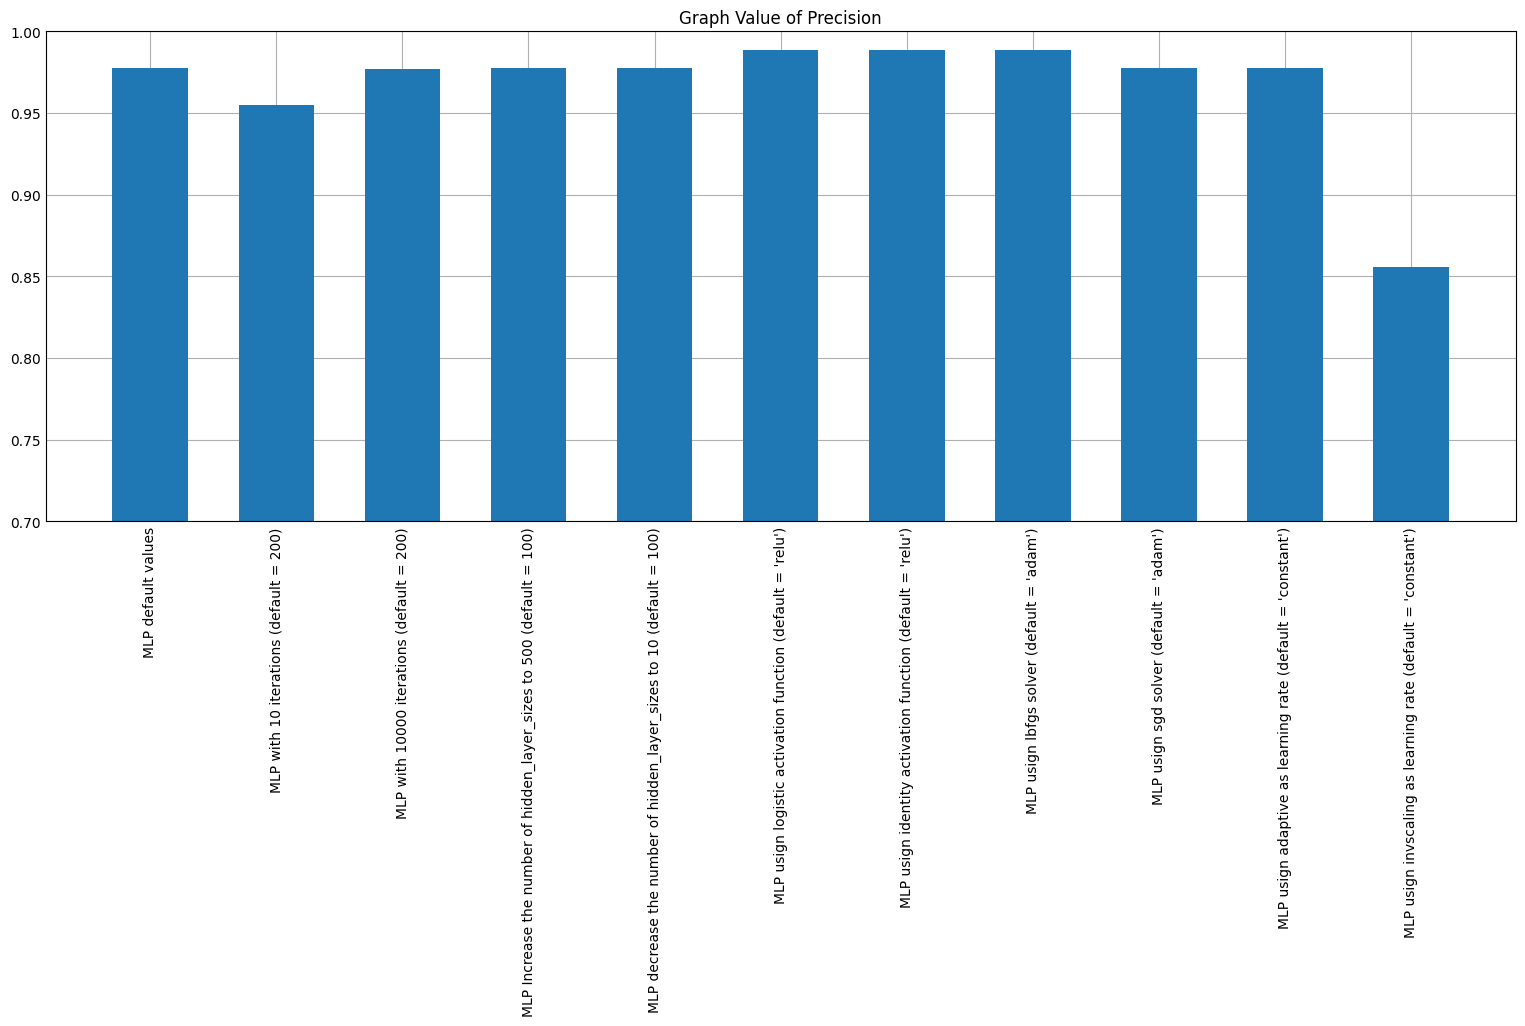

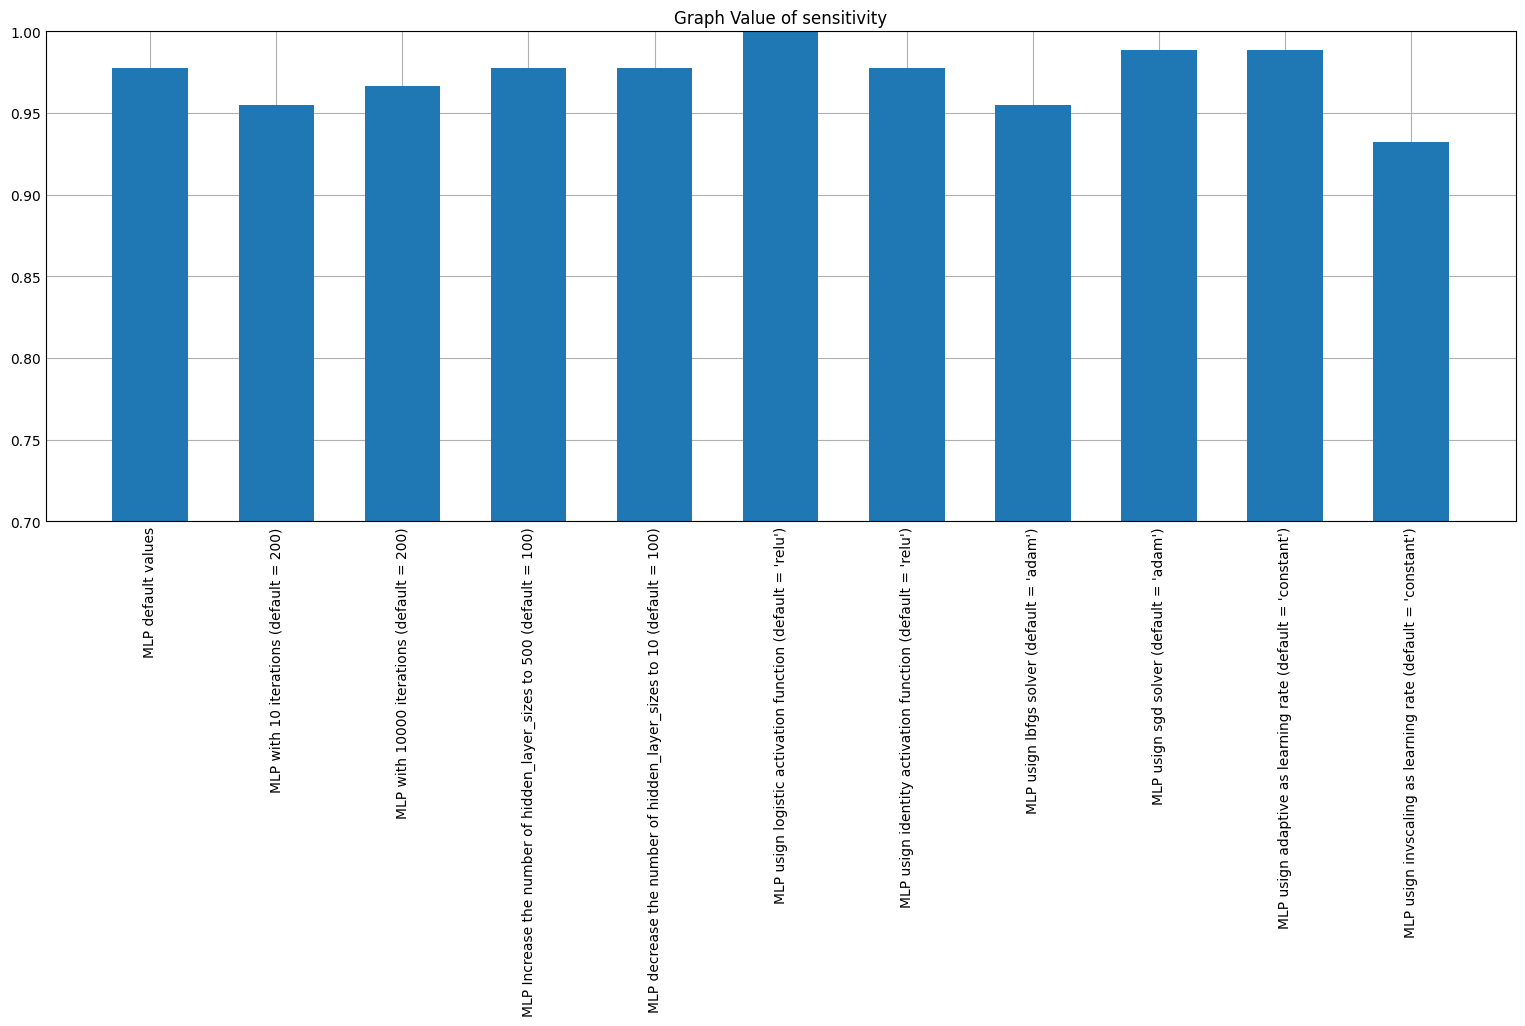

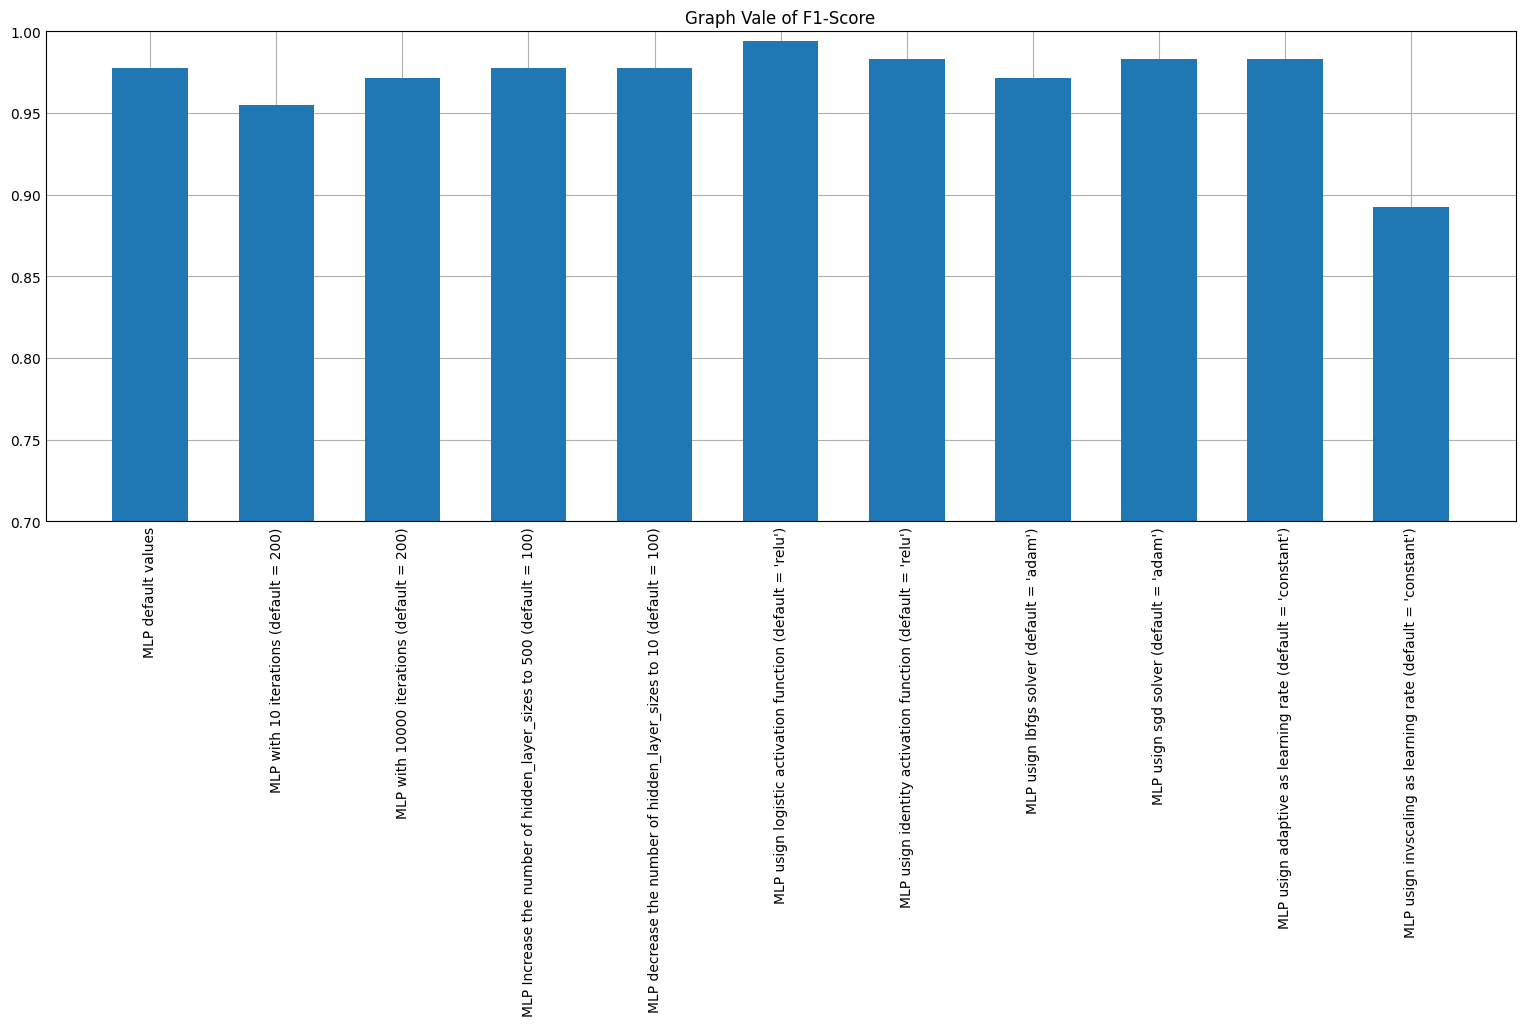

In [27]:
listPlot = [(listValidation,"Value of Cross Validation"), (listAccuracyTrain, "Value of Train Accuracy"), (listAccuracyTest, "Value of Test Accuracy"), (listPrecision, "Value of Precision"), (listSensitivy, "Value of sensitivity"), (listF1, "Vale of F1-Score")]

for info in listPlot:
  fig, ax = plt.subplots(figsize=(15,5))

  plt.title('Graph ' + info[1])
  ax.bar(listModels.keys(), info[0], width=0.6)
  ax.set(ylim=(0.7, 1), yticks=np.arange(0.7, 1, 0.05))
  plt.xticks(rotation=90, fontsize=10)

  plt.show()

#Uso do GridSearchCV para construir modelos com parâmetros mais complexos
Após essas testagens utilizando  os parâmetros de maneira individual, utilizaremos a biblioteca GridSearchCV para encontrar a melhor combinação entre esses parâmetros

In [28]:
param_grid = {
    'hidden_layer_sizes': [200, 10, 500],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [200, 10, 500, 10000]
}

# Criando e treiando o modelo de árvore de decisão
model = MLPClassifier()
gridSearch = GridSearchCV(model, param_grid, cv=5)
gridSearch.fit(dataValues, dataLabels)

print(f"Melhores parâmetros encontrados: {gridSearch.best_params_}")
print(f"Acurácia: {gridSearch.best_score_}")

Melhores parâmetros encontrados: {'activation': 'identity', 'hidden_layer_sizes': 200, 'learning_rate': 'adaptive', 'max_iter': 200, 'solver': 'sgd'}
Acurácia: 0.9841950007762769





### 1 ###
Validation Score 0.9771774569166279
Accuracy train: 0.9812206572769953
Accuracy test: 0.986013986013986
Precisão do teste: 0.9887640449438202
Sensibilidade (recall) do teste: 0.9887640449438202
F1-Score do teste: 0.9887640449438202



### 2 ###
Validation Score 0.9718987734823784
Accuracy train: 0.9859154929577465
Accuracy test: 0.986013986013986
Precisão do teste: 0.9887640449438202
Sensibilidade (recall) do teste: 0.9887640449438202
F1-Score do teste: 0.9887640449438202



### 3 ###
Validation Score 0.9824250892718522
Accuracy train: 0.9835680751173709
Accuracy test: 0.993006993006993
Precisão do teste: 0.9888888888888889
Sensibilidade (recall) do teste: 1.0
F1-Score do teste: 0.9944134078212291



### 4 ###
Validation Score 0.9771774569166279
Accuracy train: 0.9788732394366197
Accuracy test: 0.986013986013986
Precisão do teste: 0.9887640449438202
Sensibilidade (recall) do teste: 0.9887640449438202
F1-Score do teste: 0.9887640449438202



### 5 ###
Validation Score 0.977

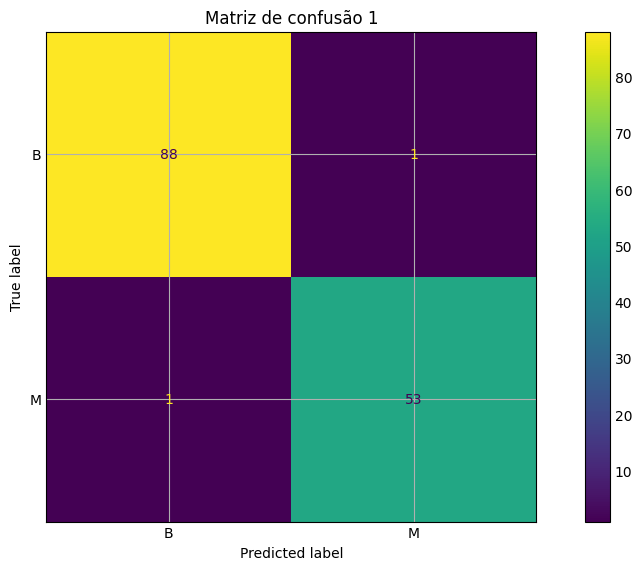

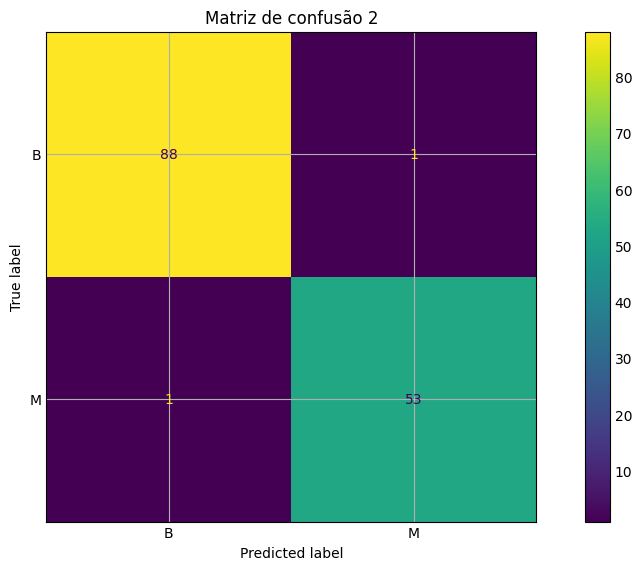

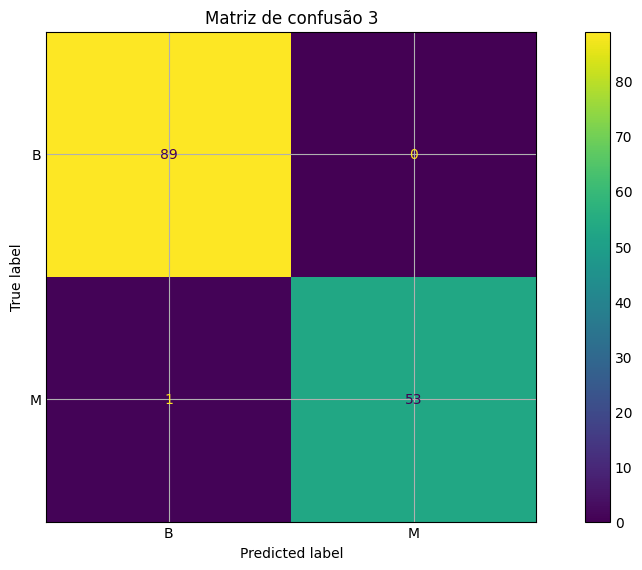

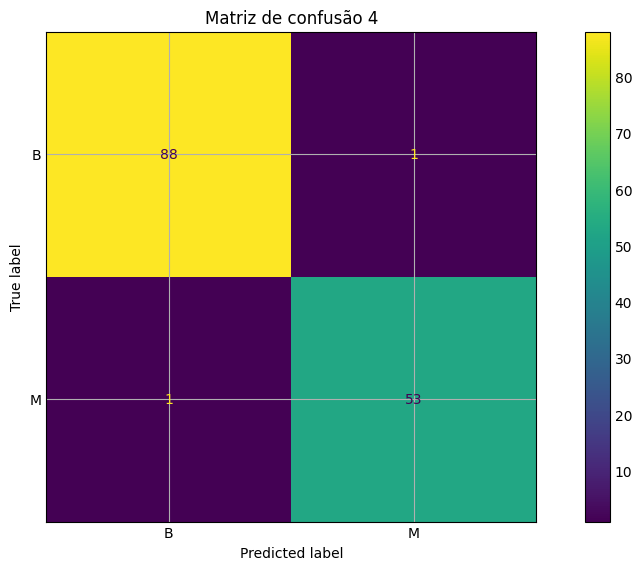

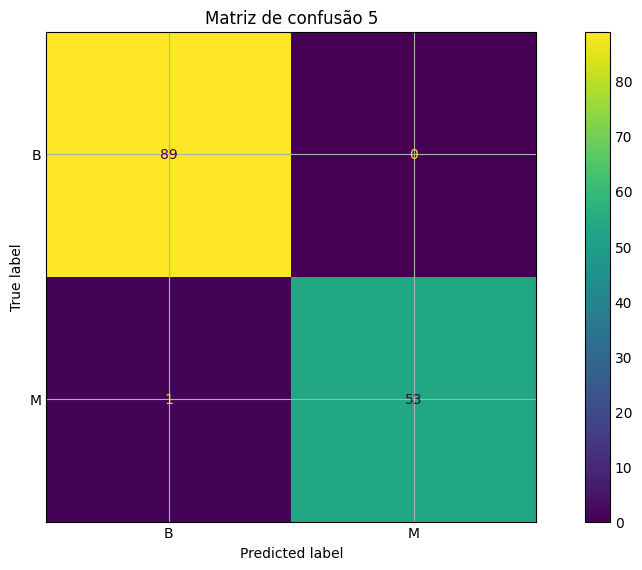

In [30]:
results = pd.DataFrame(gridSearch.cv_results_)
results = results.sort_values(by='mean_test_score', ascending=False)
top_results = results.head()
nModel = 1
for i, (params, mean_score) in enumerate(zip(top_results['params'], top_results['mean_test_score'])):
  
  print(f"\n\n\n### {nModel} ###")

  model = MLPClassifier(**params)
  
  scores = cross_val_score(model, dataValues,dataLabels, cv=5)
  mean_score = np.mean(scores)
  print("Validation Score", mean_score)

  #Trainning the Model
  model = model.fit(x_train, y_train)
  modelPredict = model.predict(x_train)
  accuracy = accuracy_score(y_train, modelPredict)
  print(f"Acurácia do treino: {accuracy}")

  #Verify the accuracy with the data of test
  modelPredict = model.predict(x_test)
  accuracy = accuracy_score(y_test, modelPredict)
  print(f"Acurácia do teste: {accuracy}")
  print(f"Precisão do teste: {precision_score(y_test, modelPredict, pos_label='B')}")
  print(f"Sensibilidade (recall) do teste: {recall_score(y_test, modelPredict, pos_label='B')}")
  print(f"F1-Score do teste: {f1_score(y_test, modelPredict, pos_label='B')}")
  
  fig, ax = plt.subplots(figsize=(10, 5))
  ConfusionMatrixDisplay.from_predictions(y_test, modelPredict, ax=ax)
  _ = ax.set_title(f"Matriz de confusão {nModel}")

  nModel += 1

#Construindo modelos mais complexos
Após a realização de testes utilizando esses parâmetros, iremos uni-los para produzir os seguintes modelos:

1. Que possua uma boa acertividade
2. Um que possua overfitting

#1. Construindo um modelo que possua boa acertividade
Para isso, após uma análise dos resultados obtidos acima, fiz alguns testes e obtive o seguinte modelo escolhendo os seguintes parâmetros (Curiosamente foi o 3 melhor modelo de acordo com score do GridSearch):

- Utilizaremos o valor default para o hidden_layer_sizes
- Utilizaremos a logistic activation function
- Utilizaremos o learning rate default

Validation Score 0.9771619313771154
Accuracy train: 0.9859154929577465
Accuracy test: 0.993006993006993
Precisão do teste: 0.9888888888888889
Sensibilidade (recall) do teste: 1.0
F1-Score do teste: 0.9944134078212291


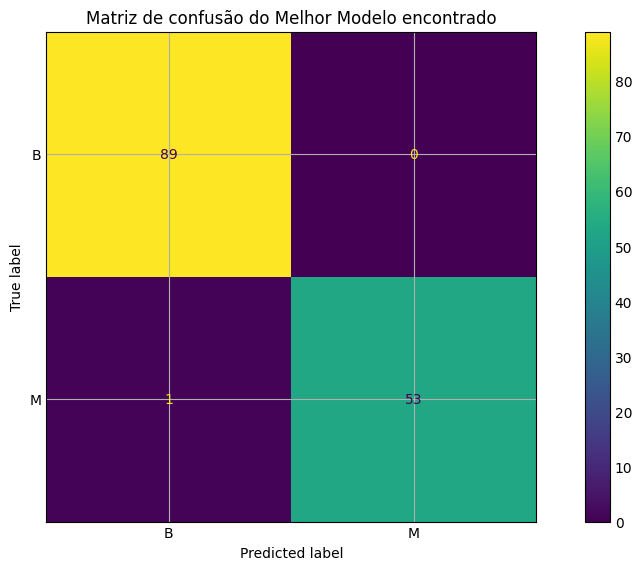

In [33]:
  model =  MLPClassifier(random_state=1, activation='logistic')
  
  scores = cross_val_score(model, dataValues,dataLabels, cv=5)
  mean_score = np.mean(scores)
  print("Validation Score", mean_score)

  #Trainning the Model
  model = model.fit(x_train, y_train)
  modelPredict = model.predict(x_train)
  accuracy = accuracy_score(y_train, modelPredict)
  print(f"Acurácia do treino: {accuracy}")

  #Verify the accuracy with the data of test
  modelPredict = model.predict(x_test)
  accuracy = accuracy_score(y_test, modelPredict)
  print(f"Acurácia do teste: {accuracy}")
  print(f"Precisão do teste: {precision_score(y_test, modelPredict, pos_label='B')}")
  print(f"Sensibilidade (recall) do teste: {recall_score(y_test, modelPredict, pos_label='B')}")
  print(f"F1-Score do teste: {f1_score(y_test, modelPredict, pos_label='B')}")
  
  fig, ax = plt.subplots(figsize=(10, 5))
  ConfusionMatrixDisplay.from_predictions(y_test, modelPredict, ax=ax)
  _ = ax.set_title(f"Matriz de confusão do Melhor Modelo encontrado")

#2. Construindo um modelo que possua um alto overfitting
- Utilizando um número alto de iterações
- utilizando um número Alto de hidden_layer_sizes
- Utilizando o solver lbfgs

Validation Score 0.9666356155876418
Accuracy train: 1.0
Accuracy test: 0.965034965034965
Precisão do teste: 0.9883720930232558
Sensibilidade (recall) do teste: 0.9550561797752809
F1-Score do teste: 0.9714285714285714


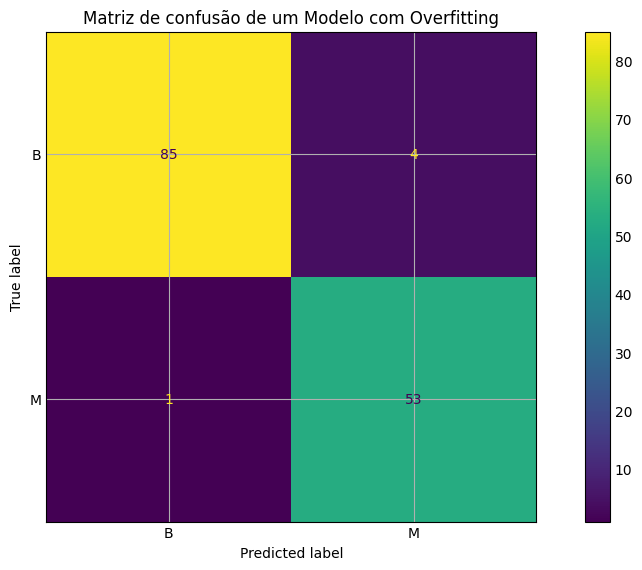

In [34]:
model = MLPClassifier(random_state=1, hidden_layer_sizes=(500,), solver='lbfgs', max_iter=10000, learning_rate='invscaling')
scores = cross_val_score(model, dataValues,dataLabels, cv=5)
mean_score = np.mean(scores)
print("Validation Score", mean_score)

#Trainning the Model
model = model.fit(x_train, y_train)
modelPredict = model.predict(x_train)
accuracy = accuracy_score(y_train, modelPredict)
print(f"Acurácia do treino: {accuracy}")

#Verify the accuracy with the data of test
modelPredict = model.predict(x_test)
accuracy = accuracy_score(y_test, modelPredict)
print(f"Acurácia do teste: {accuracy}")
print(f"Precisão do teste: {precision_score(y_test, modelPredict, pos_label='B')}")
print(f"Sensibilidade (recall) do teste: {recall_score(y_test, modelPredict, pos_label='B')}")
print(f"F1-Score do teste: {f1_score(y_test, modelPredict, pos_label='B')}")

fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, modelPredict, ax=ax)
_ = ax.set_title(f"Matriz de confusão de um Modelo com Overfitting")